In [1]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import matplotlib.pyplot as plt
import  pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Introducción al Trabajo de Aprendizaje Automático en Viviendas

El aprendizaje automático ha revolucionado la forma en que abordamos problemas complejos en una variedad de campos, y la industria inmobiliaria no es una excepción. En este trabajo, exploraremos cómo las técnicas de aprendizaje automático pueden ser aplicadas al análisis de datos de viviendas, con el objetivo de obtener una comprensión más profunda de los factores que influyen en los precios de las propiedades.

El mercado de bienes raíces es un sector dinámico y altamente competitivo en el que los precios de las viviendas varían según una serie de variables, como la ubicación, el tamaño, el estado de la propiedad y las tendencias del mercado. El aprendizaje automático ofrece herramientas poderosas para analizar estos datos complejos y descubrir patrones ocultos que pueden ayudar a los inversores, agentes inmobiliarios y compradores a tomar decisiones informadas.

En este trabajo, abordaremos una serie de aspectos clave. En primer lugar, exploraremos cómo recopilar y preparar datos relevantes para el análisis. Luego, nos sumergiremos en técnicas de preprocesamiento y visualización de datos para comprender mejor las relaciones entre las variables. A continuación, examinaremos modelos de regresión que permiten predecir los precios de las viviendas en función de características específicas. Además, exploraremos la detección de outliers, la selección de características y la validación del modelo para garantizar resultados precisos.

### 1. CARGA DE DATOS Y PREPROCESADO

Uno de los primeros pasos cruciales en un proyecto de aprendizaje automático relacionado con viviendas es la carga de datos y su preprocesamiento. Estos procesos sientan las bases para el análisis y la construcción de modelos precisos. A continuación, se describen las etapas esenciales en esta fase.

- Carga de Datos:

La calidad de los resultados de un proyecto de aprendizaje automático depende en gran medida de la calidad de los datos utilizados. La carga de datos implica la importación de conjuntos de datos que contienen información sobre viviendas. Estos datos pueden provenir de diversas fuentes, como bases de datos inmobiliarias, portales de bienes raíces en línea o fuentes gubernamentales. En esta etapa, es importante garantizar que los datos se importen correctamente y que todas las columnas relevantes, como el precio, la ubicación, el tamaño, el estado de la propiedad y otras características, estén incluidas en el conjunto de datos.

- Limpieza de Datos:

Una vez que los datos se han cargado, es fundamental realizar una limpieza de datos. Esto implica la identificación y tratamiento de valores faltantes, duplicados o erróneos. La consistencia de los datos es esencial para el éxito del análisis, por lo que es importante abordar estos problemas de manera efectiva.

- Exploración de Datos:

Una vez que los datos están limpios, es hora de explorarlos. Esto incluye el cálculo de estadísticas descriptivas, la visualización de distribuciones de variables y la identificación de relaciones entre las características. La visualización de datos a menudo revela patrones interesantes y proporciona información valiosa sobre el conjunto de datos.

- Codificación de Variables Categóricas:

Los datos relacionados con viviendas suelen incluir variables categóricas, como el tipo de propiedad o la ubicación. Estas variables deben codificarse numéricamente para ser utilizadas en algoritmos de aprendizaje automático. La codificación puede realizarse mediante técnicas como la codificación one-hot, que crea columnas binarias para cada categoría.

- Normalización y Escalado:

Para que los datos sean adecuados para muchos algoritmos de aprendizaje automático, es importante normalizar o escalar las características numéricas. Esto asegura que todas las características tengan el mismo peso en el análisis. Las técnicas comunes incluyen la estandarización (transformar las características para que tengan una media de 0 y una desviación estándar de 1) o el escalado en un rango específico.

- Selección de Características:

En algunos casos, es beneficioso seleccionar un subconjunto de las características más relevantes para el análisis y la construcción del modelo. La selección de características puede mejorar la eficiencia del modelo y reducir el riesgo de overfitting.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### CARGA DE DATOS

In [2]:
datos = pd.read_csv('train (1).csv')
datos

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
0,1,Chalet individual,2003,2003,2,Antiguo,0,Residencial unifamiliar,79.25,785.03,...,1,0,Interior,60061,0,0,0,5,3.5,375497
1,2,Chalet individual,1976,1976,1,Antiguo,0,Residencial unifamiliar,97.54,891.87,...,1,0,Frontal 2 lados,50018,0,1,0,8,3.0,339946
2,3,Chalet individual,2001,2002,2,Antiguo,0,Residencial unifamiliar,82.91,1045.16,...,1,0,Interior,60061,0,0,0,5,3.5,402511
3,4,Chalet individual,1915,1970,2,Nuevo,0,Residencial unifamiliar,73.15,887.22,...,1,0,Esquina,62451,0,0,0,5,3.5,272706
4,5,Chalet individual,2000,2000,2,Antiguo,0,Residencial unifamiliar,102.41,1324.80,...,1,0,Frontal 2 lados,60706,0,0,0,5,4.0,450236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Chalet individual,1946,1950,1,NaN,0,Residencial unifamiliar,62.18,437.76,...,1,0,Interior,62801,0,1,0,7,2.0,236865
996,997,Chalet individual,1961,1961,1,Antiguo,0,Residencial unifamiliar,NaN,990.25,...,1,0,Interior,50014,0,0,0,6,2.5,265888
997,998,Chalet individual,1970,1970,1,Antiguo,0,Residencial unifamiliar,NaN,1088.54,...,1,0,Interior,50012,0,0,0,6,3.0,320360
998,999,Chalet individual,1922,1950,1,Nuevo,0,Residencial tipo 2,73.15,909.15,...,1,0,Interior,60406,0,0,0,4,1.5,177259


#### LIMPIEZA E IMPUTACION DE DATOS 

Vamos a ver que datos nos faltan

In [3]:
datos.isna().sum()

Id                      0
Tipo                    0
FechaConstruccion       0
FechaReforma            0
Plantas                 0
Plan                  233
PAU                     0
CatParcela              0
PerimParcela          173
Superficie              0
Aseos                   0
Habitaciones            0
Garaje                  0
Piscina                 0
Vallada                 0
CallePavimentada        0
Callejon                0
Formato                 0
TipoDesnivel            0
Desnivel                0
GasNatural              0
AguaCorriente           0
FosaSeptica             0
Situacion               0
CP                      0
ProxCarretera           0
ProxCallePrincipal      0
ProxViasTren            0
Estado                  0
RatingEstrellas         0
Precio                  0
dtype: int64

vemos que nos faltan datos de plan y de perimetro de la parcela, vamos a ver que tipos de plan tenemos

In [4]:
datos['Plan'].unique()

array(['Antiguo', 'Nuevo', nan], dtype=object)

vemos que puede ser solo antiguo o nuevo

El perimetro de parcela puede venir dado por el area o superficie, vamos a intentar encontrar un multiplo medio para imputar los valores


In [5]:
datos['multiplo_medio'] = datos['Superficie'] / datos['PerimParcela']
multiplo_medio = datos['multiplo_medio'].mean()
multiplo_medio

11.041549379174883

In [6]:
valores_faltantes = datos['PerimParcela'].isna()
datos.loc[valores_faltantes, 'PerimParcela'] = datos.loc[valores_faltantes, 'Superficie'] / multiplo_medio

In [7]:
datos.drop(['multiplo_medio'], axis=1, inplace= True)

In [8]:
datos.isna().sum()

Id                      0
Tipo                    0
FechaConstruccion       0
FechaReforma            0
Plantas                 0
Plan                  233
PAU                     0
CatParcela              0
PerimParcela            0
Superficie              0
Aseos                   0
Habitaciones            0
Garaje                  0
Piscina                 0
Vallada                 0
CallePavimentada        0
Callejon                0
Formato                 0
TipoDesnivel            0
Desnivel                0
GasNatural              0
AguaCorriente           0
FosaSeptica             0
Situacion               0
CP                      0
ProxCarretera           0
ProxCallePrincipal      0
ProxViasTren            0
Estado                  0
RatingEstrellas         0
Precio                  0
dtype: int64

el siguiente paso es intentar sacar algun parametro del que depende el plan urbanistico

In [9]:
datos[datos['Plan'] == 'Nuevo'].head(10)

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
3,4,Chalet individual,1915,1970,2,Nuevo,0,Residencial unifamiliar,73.15,887.22,...,1,0,Esquina,62451,0,0,0,5,3.5,272706
29,30,Chalet individual,1927,1950,1,Nuevo,0,Residencial tipo 2,73.15,587.52,...,1,0,Interior,62801,0,1,1,6,2.0,123365
30,31,Chalet individual,1920,1950,2,Nuevo,0,Terciario,60.96,789.68,...,1,0,Interior,60406,0,1,0,4,2.0,72038
63,64,Chalet individual,1921,1950,2,Nuevo,0,Residencial tipo 2,60.96,956.90,...,1,0,Interior,61704,0,1,0,6,3.5,233110
68,69,Chalet individual,1945,1950,1,Nuevo,0,Residencial tipo 2,57.30,428.10,...,1,0,Esquina,61704,1,0,0,6,2.0,133206
92,93,Chalet individual,1921,2006,1,Nuevo,0,Residencial unifamiliar,97.54,1241.18,...,1,0,Interior,62451,0,0,0,7,2.5,283129
98,99,Chalet individual,1920,1950,1,Nuevo,0,Residencial unifamiliar,103.63,987.09,...,1,0,Esquina,61528,0,0,0,5,2.5,138201
106,107,Chalet individual,1885,1995,1,Nuevo,0,Residencial tipo 2,73.15,1003.35,...,1,0,Interior,61704,0,0,0,7,2.0,187298
114,115,Chalet individual,1945,2002,2,Nuevo,0,Residencial unifamiliar,74.37,674.38,...,1,0,Interior,62451,0,0,0,8,3.0,486039
146,147,Chalet individual,1931,1993,1,Nuevo,0,Residencial tipo 2,62.18,568.57,...,1,0,Esquina,62801,0,0,0,7,2.5,181826


parece que se ve una pequena caracteristica y es que todos los del plan nuevo parece que tienen una fecha anterior a al menos 1946, ya que el chalet 68 y 115 que nos aparece en esa cabecera es de 1945, vamos a probar con eso

In [10]:
condicion = (datos['FechaConstruccion'] < 1946) & (datos['Plan'] == 'Nuevo')
resultado = datos[condicion]
resultado

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
3,4,Chalet individual,1915,1970,2,Nuevo,0,Residencial unifamiliar,73.150000,887.22,...,1,0,Esquina,62451,0,0,0,5,3.5,272706
29,30,Chalet individual,1927,1950,1,Nuevo,0,Residencial tipo 2,73.150000,587.52,...,1,0,Interior,62801,0,1,1,6,2.0,123365
30,31,Chalet individual,1920,1950,2,Nuevo,0,Terciario,60.960000,789.68,...,1,0,Interior,60406,0,1,0,4,2.0,72038
63,64,Chalet individual,1921,1950,2,Nuevo,0,Residencial tipo 2,60.960000,956.90,...,1,0,Interior,61704,0,1,0,6,3.5,233110
68,69,Chalet individual,1945,1950,1,Nuevo,0,Residencial tipo 2,57.300000,428.10,...,1,0,Esquina,61704,1,0,0,6,2.0,133206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,940,Chalet individual,1940,1950,2,Nuevo,0,Residencial unifamiliar,202.691662,2238.03,...,1,0,Interior,62447,0,0,0,7,3.5,406944
974,975,Chalet individual,1910,1993,2,Nuevo,0,Residencial unifamiliar,73.150000,1060.40,...,1,0,Esquina,62801,0,1,0,8,3.5,290056
976,977,Chalet individual,1923,1958,1,Nuevo,0,Residencial unifamiliar,62.180000,548.13,...,1,0,Interior,62801,0,0,0,7,2.0,166545
991,992,Chalet individual,1882,1986,2,Nuevo,0,Residencial tipo 2,147.520000,1641.69,...,1,0,Esquina,61704,1,0,0,9,4.0,290922


In [11]:
condicion = (datos['FechaConstruccion'] >= 1946) & (datos['Plan'] == 'Antiguo')
resultado = datos[condicion]
resultado

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
0,1,Chalet individual,2003,2003,2,Antiguo,0,Residencial unifamiliar,79.250000,785.03,...,1,0,Interior,60061,0,0,0,5,3.5,375497
1,2,Chalet individual,1976,1976,1,Antiguo,0,Residencial unifamiliar,97.540000,891.87,...,1,0,Frontal 2 lados,50018,0,1,0,8,3.0,339946
2,3,Chalet individual,2001,2002,2,Antiguo,0,Residencial unifamiliar,82.910000,1045.16,...,1,0,Interior,60061,0,0,0,5,3.5,402511
4,5,Chalet individual,2000,2000,2,Antiguo,0,Residencial unifamiliar,102.410000,1324.80,...,1,0,Frontal 2 lados,60706,0,0,0,5,4.0,450236
6,7,Chalet individual,2004,2005,1,Antiguo,0,Residencial unifamiliar,91.440000,936.83,...,1,0,Interior,50011,0,0,0,5,4.0,575005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Chalet individual,2005,2006,2,Antiguo,0,Residencial unifamiliar,82.910000,821.82,...,1,0,Interior,60061,0,0,0,5,3.0,338740
994,995,Chalet individual,2006,2007,1,Antiguo,0,Residencial unifamiliar,117.040000,1157.20,...,1,0,Frontal 2 lados,60645,0,0,0,5,5.0,584441
996,997,Chalet individual,1961,1961,1,Antiguo,0,Residencial unifamiliar,89.683972,990.25,...,1,0,Interior,50014,0,0,0,6,2.5,265888
997,998,Chalet individual,1970,1970,1,Antiguo,0,Residencial unifamiliar,98.585802,1088.54,...,1,0,Interior,50012,0,0,0,6,3.0,320360


Vamos a ver si 683 son todos los de plan antiguo para confirmar

In [12]:
condicion = (datos['Plan'] == 'Antiguo')
resultado = datos[condicion]
resultado

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
0,1,Chalet individual,2003,2003,2,Antiguo,0,Residencial unifamiliar,79.250000,785.03,...,1,0,Interior,60061,0,0,0,5,3.5,375497
1,2,Chalet individual,1976,1976,1,Antiguo,0,Residencial unifamiliar,97.540000,891.87,...,1,0,Frontal 2 lados,50018,0,1,0,8,3.0,339946
2,3,Chalet individual,2001,2002,2,Antiguo,0,Residencial unifamiliar,82.910000,1045.16,...,1,0,Interior,60061,0,0,0,5,3.5,402511
4,5,Chalet individual,2000,2000,2,Antiguo,0,Residencial unifamiliar,102.410000,1324.80,...,1,0,Frontal 2 lados,60706,0,0,0,5,4.0,450236
6,7,Chalet individual,2004,2005,1,Antiguo,0,Residencial unifamiliar,91.440000,936.83,...,1,0,Interior,50011,0,0,0,5,4.0,575005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Chalet individual,2005,2006,2,Antiguo,0,Residencial unifamiliar,82.910000,821.82,...,1,0,Interior,60061,0,0,0,5,3.0,338740
994,995,Chalet individual,2006,2007,1,Antiguo,0,Residencial unifamiliar,117.040000,1157.20,...,1,0,Frontal 2 lados,60645,0,0,0,5,5.0,584441
996,997,Chalet individual,1961,1961,1,Antiguo,0,Residencial unifamiliar,89.683972,990.25,...,1,0,Interior,50014,0,0,0,6,2.5,265888
997,998,Chalet individual,1970,1970,1,Antiguo,0,Residencial unifamiliar,98.585802,1088.54,...,1,0,Interior,50012,0,0,0,6,3.0,320360


hemos comprobado que si la fecha de construccion es menor que 1946 el Plan es Nuevo

In [13]:
def llenar_plan(row):
    if pd.isna(row['Plan']):
        if row['FechaConstruccion'] < 1946:
            return 'Nuevo'
        else:
            return 'Antiguo'
    else:
        return row['Plan']

# Aplica la función a cada fila del DataFrame
datos['Plan'] = datos.apply(llenar_plan, axis=1)

In [14]:
datos.isna().sum()

Id                    0
Tipo                  0
FechaConstruccion     0
FechaReforma          0
Plantas               0
Plan                  0
PAU                   0
CatParcela            0
PerimParcela          0
Superficie            0
Aseos                 0
Habitaciones          0
Garaje                0
Piscina               0
Vallada               0
CallePavimentada      0
Callejon              0
Formato               0
TipoDesnivel          0
Desnivel              0
GasNatural            0
AguaCorriente         0
FosaSeptica           0
Situacion             0
CP                    0
ProxCarretera         0
ProxCallePrincipal    0
ProxViasTren          0
Estado                0
RatingEstrellas       0
Precio                0
dtype: int64

#### CODIFICACION DE VARIABLES CATEGORICAS

ya tenemos todos los valorews completos ahora vamos a hacer x e y y unos dummies de los valores no int, Tipo, Plan, CatParcela...

In [15]:
datos.dtypes

Id                      int64
Tipo                   object
FechaConstruccion       int64
FechaReforma            int64
Plantas                 int64
Plan                   object
PAU                     int64
CatParcela             object
PerimParcela          float64
Superficie            float64
Aseos                   int64
Habitaciones            int64
Garaje                  int64
Piscina                 int64
Vallada                 int64
CallePavimentada        int64
Callejon                int64
Formato                object
TipoDesnivel           object
Desnivel               object
GasNatural              int64
AguaCorriente           int64
FosaSeptica             int64
Situacion              object
CP                      int64
ProxCarretera           int64
ProxCallePrincipal      int64
ProxViasTren            int64
Estado                  int64
RatingEstrellas       float64
Precio                  int64
dtype: object

Hacemos dummies de las categorias no numericas

In [16]:
columnas_no_numericas = datos.select_dtypes(exclude=[int, float]).columns
df = pd.get_dummies(datos, columns=columnas_no_numericas)
df.head()

,Id,FechaConstruccion,FechaReforma,Plantas,PAU,PerimParcela,Superficie,Aseos,Habitaciones,Garaje,...,TipoDesnivel_Llana,TipoDesnivel_Muy irregular,Desnivel_Elevado,Desnivel_Ligero,Desnivel_Moderado,Situacion_Esquina,Situacion_Frontal 2 lados,Situacion_Frontal 3 lados,Situacion_Interior,Situacion_Trasero
0,1,2003,2003,2,0,79.25,785.03,4,8,1,...,True,False,False,True,False,False,False,False,True,False
1,2,1976,1976,1,0,97.54,891.87,3,6,1,...,True,False,False,True,False,False,True,False,False,False
2,3,2001,2002,2,0,82.91,1045.16,4,6,1,...,True,False,False,True,False,False,False,False,True,False
3,4,1915,1970,2,0,73.15,887.22,2,7,1,...,True,False,False,True,False,True,False,False,False,False
4,5,2000,2000,2,0,102.41,1324.80,4,9,1,...,True,False,False,True,False,False,True,False,False,False


lo tenemos en forma bool, vamos a pasar todo a float

In [17]:
df = df.astype(float)
df

,Id,FechaConstruccion,FechaReforma,Plantas,PAU,PerimParcela,Superficie,Aseos,Habitaciones,Garaje,...,TipoDesnivel_Llana,TipoDesnivel_Muy irregular,Desnivel_Elevado,Desnivel_Ligero,Desnivel_Moderado,Situacion_Esquina,Situacion_Frontal 2 lados,Situacion_Frontal 3 lados,Situacion_Interior,Situacion_Trasero
0,1.0,2003.0,2003.0,2.0,0.0,79.250000,785.03,4.0,8.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,1976.0,1976.0,1.0,0.0,97.540000,891.87,3.0,6.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,2001.0,2002.0,2.0,0.0,82.910000,1045.16,4.0,6.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,1915.0,1970.0,2.0,0.0,73.150000,887.22,2.0,7.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,2000.0,2000.0,2.0,0.0,102.410000,1324.80,4.0,9.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,1946.0,1950.0,1.0,0.0,62.180000,437.76,3.0,5.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
996,997.0,1961.0,1961.0,1.0,0.0,89.683972,990.25,2.0,6.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
997,998.0,1970.0,1970.0,1.0,0.0,98.585802,1088.54,2.0,6.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
998,999.0,1922.0,1950.0,1.0,0.0,73.150000,909.15,1.0,6.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### EXPLORACION DE DATOS

Vamos a ver con IQR si tenemeos outliers significantes en algunas de las columnas (sobretodo las 10 primeras)

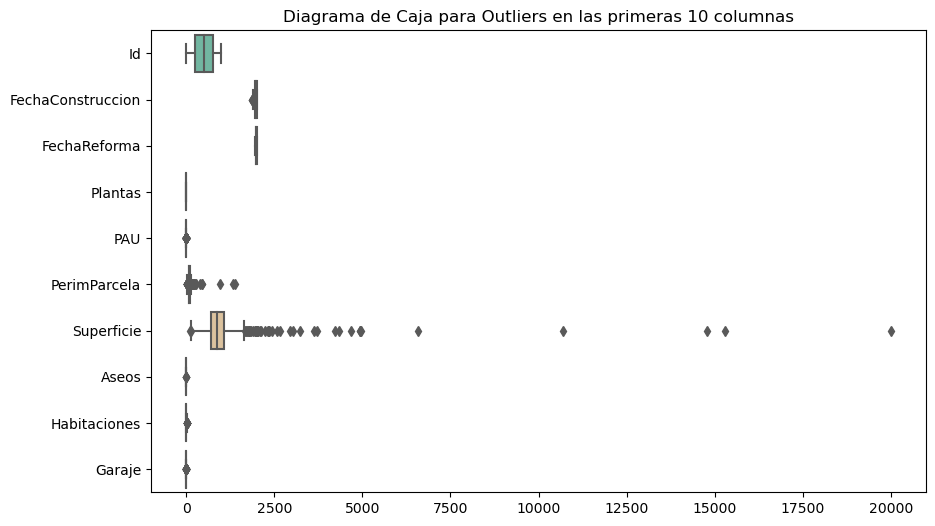

Columnas con outliers:
FechaConstruccion
PAU
PerimParcela
Superficie
Aseos
Habitaciones
Garaje


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las primeras 10 columnas de tu DataFrame df
df_subset = df.iloc[:, :10]

# Calcular estadísticas descriptivas
desc_stats = df_subset.describe()

# Crear un boxplot para cada columna con posibles outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_subset, orient="h", palette="Set2")
plt.title("Diagrama de Caja para Outliers en las primeras 10 columnas")
plt.show()

# Identificar las columnas con outliers
outlier_columns = []
for column in df_subset.columns:
    Q1 = desc_stats[column]['25%']
    Q3 = desc_stats[column]['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_subset[(df_subset[column] < lower_bound) | (df_subset[column] > upper_bound)]
    if not outliers.empty:
        outlier_columns.append(column)

# Imprimir las columnas con outliers
if outlier_columns:
    print("Columnas con outliers:")
    for column in outlier_columns:
        print(column)
else:
    print("No se encontraron outliers en las primeras 10 columnas de df.")

Vemos que la mas evidente es Superficie, donde tenemos un gran numero de outliers extremos, por lo que vamos a eliminar las viviendas con una superficie mayor a 2800, ya que pueden ser viviendas donde se esta tomando un dato distinto

In [19]:
df = df[df['Superficie'] <= 2800]

#### ESCALADO

In [20]:
y = df['Precio']
x = df.drop(['Precio'], axis=1)

ahora ya tenemos nuestro df completo, vamos a escalar los datos

In [21]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Ajustar el scaler a tus datos (calcula la media y la desviación estándar)
scaler.fit(x) 
# Realizar la transformación Z-Score en tus datos
x_scaled = scaler.transform(x)

# El resultado estará en forma de un ndarray de Numpy. Puedes convertirlo de nuevo a un DataFrame si es necesario.
x = pd.DataFrame(x_scaled, columns=x.columns)
x

,Id,FechaConstruccion,FechaReforma,Plantas,PAU,PerimParcela,Superficie,Aseos,Habitaciones,Garaje,...,TipoDesnivel_Llana,TipoDesnivel_Muy irregular,Desnivel_Elevado,Desnivel_Ligero,Desnivel_Moderado,Situacion_Esquina,Situacion_Frontal 2 lados,Situacion_Frontal 3 lados,Situacion_Interior,Situacion_Trasero
0,-1.727473,1.040946,0.868480,1.036701,-0.349295,-0.212058,-0.312394,1.723821,0.955039,0.245652,...,0.313392,-0.136505,-0.078326,0.221451,-0.205847,-0.47798,-0.180358,-0.045129,0.621221,-0.25027
1,-1.724021,0.143553,-0.452512,-0.828224,-0.349295,0.413871,-0.010503,0.628766,-0.301323,0.245652,...,0.313392,-0.136505,-0.078326,0.221451,-0.205847,-0.47798,5.544541,-0.045129,-1.609733,-0.25027
2,-1.720568,0.974472,0.819554,1.036701,-0.349295,-0.086804,0.422639,1.723821,-0.301323,0.245652,...,0.313392,-0.136505,-0.078326,0.221451,-0.205847,-0.47798,-0.180358,-0.045129,0.621221,-0.25027
3,-1.717116,-1.883889,-0.746066,1.036701,-0.349295,-0.420815,-0.023642,-0.466289,0.326858,0.245652,...,0.313392,-0.136505,-0.078326,0.221451,-0.205847,2.09214,-0.180358,-0.045129,-1.609733,-0.25027
4,-1.713664,0.941235,0.721703,1.036701,-0.349295,0.580535,1.212800,1.723821,1.583220,0.245652,...,0.313392,-0.136505,-0.078326,0.221451,-0.205847,-0.47798,5.544541,-0.045129,-1.609733,-0.25027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1.707622,-0.853550,-1.724579,-0.828224,-0.349295,-0.796236,-1.293652,0.628766,-0.929503,0.245652,...,0.313392,-0.136505,-0.078326,-4.515673,4.857983,-0.47798,-0.180358,-0.045129,0.621221,-0.25027
980,1.711074,-0.354998,-1.186397,-0.828224,-0.349295,0.145018,0.267483,-0.466289,-0.301323,0.245652,...,0.313392,-0.136505,-0.078326,0.221451,-0.205847,-0.47798,-0.180358,-0.045129,0.621221,-0.25027
981,1.714527,-0.055867,-0.746066,-0.828224,-0.349295,0.449661,0.545215,-0.466289,-0.301323,0.245652,...,0.313392,-0.136505,-0.078326,0.221451,-0.205847,-0.47798,-0.180358,-0.045129,0.621221,-0.25027
982,1.717979,-1.651232,-1.724579,-0.828224,-0.349295,-0.420815,0.038324,-1.561344,-0.301323,0.245652,...,0.313392,-0.136505,-0.078326,0.221451,-0.205847,-0.47798,-0.180358,-0.045129,0.621221,-0.25027


## ENTRENAMIENTO Y VALIDACION

Una vez que hemos realizado la carga de datos y el preprocesamiento, el siguiente paso crítico en un proyecto de aprendizaje automático en viviendas es la fase de entrenamiento y validación de modelos. En esta etapa, se construyen y evalúan modelos predictivos que tienen como objetivo comprender y predecir el comportamiento de los precios de las viviendas. A continuación, se describen las principales actividades involucradas en esta fase.

- División de los Datos:

El primer paso es dividir el conjunto de datos en dos subconjuntos: el conjunto de entrenamiento y el conjunto de validación. En este caso haremos una primera division con un 80% train y 20% test, y despues una subdivision de train para realizar una cross validation con 10 folds. La validación cruzada es especialmente útil cuando se tiene un conjunto de datos limitado y se necesita maximizar el uso de la información disponible. Ayuda a detectar problemas de variabilidad en la calidad de los datos y proporciona una estimación más precisa del rendimiento del modelo.

- Selección de Modelos:

En esta etapa, se seleccionan los modelos de aprendizaje automático que se utilizarán para predecir los precios de las viviendas. En este caso XXXX

- Entrenamiento del Modelo:

El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo seleccionado. Durante el entrenamiento, el modelo aprende a relacionar las características de las viviendas con los precios observados en el conjunto de entrenamiento.

- Validación del Modelo:

Una vez que el modelo ha sido entrenado, se evalúa su rendimiento en el conjunto de validación. Se calculan métricas de evaluación, como el xxxxxxx. Estas métricas proporcionan información sobre la precisión del modelo y su capacidad para hacer predicciones precisas.

- Ajuste de Hiperparámetros:

En algunos casos, es necesario ajustar los hiperparámetros del modelo para mejorar su rendimiento. Esto implica modificar configuraciones como la profundidad de los árboles en un modelo de bosque aleatorio o la tasa de aprendizaje en una red neuronal. El ajuste de hiperparámetros se realiza mediante técnicas como la búsqueda de cuadrícula o la búsqueda aleatoria.

- Evaluación del Rendimiento:

El rendimiento del modelo se evalúa en función de las métricas calculadas en el conjunto de validación. Se analizan los resultados y se toman decisiones sobre si el modelo es adecuado para el problema o si se requieren ajustes adicionales.


El proceso de entrenamiento y validación es fundamental para garantizar que el modelo predictivo sea preciso y generalizable a nuevos datos. Esta fase permite afinar el modelo, seleccionar el algoritmo más adecuado y tomar decisiones informadas sobre su capacidad para predecir los precios de las viviendas en función de las características disponibles.

In [22]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, train_test_split
import pickle

def regresion_con_validacion_cruzada_y_test(X, y):
  
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle= False)
    
    # Inicializa los modelos
    modelos = {
        "Random Forest": RandomForestRegressor(),
        #"Elastic Net": ElasticNet(),
        #"HURBER": HuberRegressor(),
        "SVR": SVR(),        
        "GBR": GradientBoostingRegressor()
    }
    
 
    resultados = {}
    for nombre, modelo in modelos.items():
        mse_scores = []
        r2_scores = []
        mae_scores = []
        mape_scores = []
        msl_scores = []
        
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        for train_index, val_index in kf.split(X_train):
            
            train_index = train_index.astype('int64')
            X_train_fold = X_train.iloc[train_index]
            X_val_fold = X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
            modelo.fit(X_train_fold, y_train_fold)

            y_pred = modelo.predict(X_val_fold)
            
            mse_fold = mean_squared_error(y_val_fold, y_pred)
            r2_fold = r2_score(y_val_fold, y_pred)
            mae_fold = mean_absolute_error(y_val_fold, y_pred)
            mape_fold = (mean_absolute_percentage_error(y_val_fold, y_pred)*100)
            msl_fold = mean_squared_log_error(y_val_fold, y_pred)
            
            mse_scores.append(mse_fold)
            r2_scores.append(r2_fold)
            mae_scores.append(mae_fold)
            mape_scores.append(mape_fold)
            msl_scores.append(msl_fold)

        mse_promedio = np.mean(mse_scores)
        r2_promedio = np.mean(r2_scores)
        mae_promedio = np.mean(mae_scores)
        mape_promedio = np.mean(mape_scores)
        msl_promedio = np.mean(msl_scores)
        
        # Evalúa el modelo en el conjunto de prueba
        modelo.fit(X_train, y_train)  
        with open('modelogbrfin.pkl', 'wb') as archivo:
         pickle.dump(modelo, archivo)
        y_pred_test = modelo.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
        mae_test =  mean_absolute_error(y_test, y_pred_test)
        mape_test =  (mean_absolute_percentage_error(y_test, y_pred_test)*100)
        msl_test = mean_squared_log_error(y_test, y_pred_test)
        
        resultados[nombre] = {
            'MSE Promedio': mse_promedio,
            'R² Promedio': r2_promedio,
            'MAE Promedio': mae_promedio,
            'MAPE Promedio': mape_promedio,
            'MSL Promedio': msl_promedio,
            'MSE en Test': mse_test,
            'R² en Test': r2_test,
            'MAE en Test': mae_test,
            'MAPE en Test': mape_test,
            'MSL en Test': msl_test,
            
        }
    
    return resultados


resultados = regresion_con_validacion_cruzada_y_test(x, y)


for modelo, metricas in resultados.items():
    print(f"Modelo: {modelo}")
    print(f"MSE Promedio en Validación Cruzada: {metricas['MSE Promedio']}")
    print(f"R² Promedio en Validación Cruzada: {metricas['R² Promedio']}")
    print(f"MAE Promedio en Validación Cruzada: {metricas['MAE Promedio']}")
    print(f"MAPE Promedio en Validación Cruzada: {metricas['MAPE Promedio']}")   
    print(f"MSL Promedio en Validación Cruzada: {metricas['MSL Promedio']}")   
    print(f"MSE en Test: {metricas['MSE en Test']}")
    print(f"R² en Test: {metricas['R² en Test']}")
    print(f"MAE en Test: {metricas['MAE en Test']}")
    print(f"MAPE en Test: {metricas['MAPE en Test']}")
    print(f"MASL en Test: {metricas['MSL en Test']}")
    print()

Modelo: Random Forest
MSE Promedio en Validación Cruzada: 4465727346.415257
R² Promedio en Validación Cruzada: 0.7879393842068584
MAE Promedio en Validación Cruzada: 45633.66088055825
MAPE Promedio en Validación Cruzada: 14.364379127163843
MSL Promedio en Validación Cruzada: 0.033889895082668584
MSE en Test: 3745122042.651772
R² en Test: 0.7761521507807153
MAE en Test: 40495.917309644676
MAPE en Test: 13.664296242283816
MASL en Test: 0.03358624936551925

Modelo: SVR
MSE Promedio en Validación Cruzada: 23318506028.69855
R² Promedio en Validación Cruzada: -0.06731111304191374
MAE Promedio en Validación Cruzada: 106464.9918630071
MAPE Promedio en Validación Cruzada: 33.67573165702545
MSL Promedio en Validación Cruzada: 0.1743160478668675
MSE en Test: 17146659471.794422
R² en Test: -0.024864557241224272
MAE en Test: 86307.41981297794
MAPE en Test: 29.54586444117962
MASL en Test: 0.14111167116912754

Modelo: GBR
MSE Promedio en Validación Cruzada: 4216480894.7866583
R² Promedio en Validació

aqui comentamos results xxxxxxxxxxxxxxxxxxxxxxxxxxxx

Ahora vamnos a realizar un gridsearch para buscar la mejor confuguracion de cada algoritmo y comprobar si mejoramos los resultados, en este caso para la busqueda vamos a hacer simplemente una separacion entre train y test

In [23]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# GridSearch para SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [10, 20, 30, 40, 50, 80, 100, 200, 300, 400, 500, 700],
    'epsilon': [0.5, 0.1, 0.01, 0.001, 0.005, 0.0007, 0.0001, 0.00005, 0.00001]
}

svr = SVR()
grid_svr = GridSearchCV(svr, param_grid_svr, cv=5)
grid_svr.fit(X_train, y_train)

# GridSearch para Huber Regressor
param_grid_huber = {
    'epsilon': [1.15, 1.35, 1.5, 1.75, 2,2.10, 2.15, 2.20, 2.3,2.4, 2.5, 2.6, 2.8],
    'alpha': [0.0008, 0.0006, 0.0003, 0.0002, 0.0001, 0.001, 0.01, 0.1],
    'max_iter': [40, 50, 60, 70, 80 ]
}

huber = HuberRegressor()
grid_huber = GridSearchCV(huber, param_grid_huber, cv=5)
grid_huber.fit(X_train, y_train)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realiza una búsqueda de cuadrícula para Random Forest.
rf = RandomForestRegressor()
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

param_grid_gbr = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.005, 0.01, 0.1],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10]
}

# Realiza una búsqueda de cuadrícula para Gradient Boosting Regressor.
gbr = GradientBoostingRegressor()
grid_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5)
grid_gbr.fit(X_train, y_train)
# Imprimir los mejores parámetros para SVR y Huber Regressor
print("Mejores parámetros para SVR:", grid_svr.best_params_)
print("Mejores parámetros para Huber Regressor:", grid_huber.best_params_)
print("Mejores parámetros para RF:", grid_rf.best_params_)
print("Mejores parámetros para GBR:", grid_gbr.best_params_)

y_pred_svr = grid_svr.best_estimator_.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
y_pred_huber = grid_huber.best_estimator_.predict(X_test)
y_pred_gbr = grid_gbr.best_estimator_.predict(X_test)

# Evalúa los modelos.
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mape_huber = mean_absolute_percentage_error(y_test, y_pred_huber)
mape_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)

print("MAPE para svr:", mape_svr)
print("MAPE para Random Forest:", mape_rf)
print("MAPE para Huber Regressor:", mape_huber)
print("MAPE para Gradient Boosting Regressor:", mape_gbr)

KeyboardInterrupt: 

Mejores parámetros para SVR: {'C': 700, 'epsilon': 0.5, 'kernel': 'linear'}
Mejores parámetros para Huber Regressor: {'alpha': 0.0001, 'epsilon': 2.15, 'max_iter': 40}
Mejores parámetros para RF: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Mejores parámetros para GBR: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 300}

In [27]:
def regresion_con_validacion_cruzada_y_test_grid(X, y):
  
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle= False)
    
    # Inicializa los modelos
    modelos = {
        #"Random Forest": grid_rf.best_estimator_,
        #"Elastic Net": ElasticNet(random_state=42),
        #"HURBER": grid_huber.best_estimator_,
        #"SVR": SVR(C= 300, epsilon= 0.3,kernel= 'linear'),
        #"SVR": grid_svr.best_estimator_,
        "GBR": GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=8, min_samples_split=15, n_estimators=300)
       
    }
    
 
    resultados = {}
    for nombre, modelo in modelos.items():
        mse_scores = []
        r2_scores = []
        mae_scores = []
        mape_scores = []
        msl_scores = []
        
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        for train_index, val_index in kf.split(X_train):
            
            train_index = train_index.astype('int64')
            X_train_fold = X_train.iloc[train_index]
            X_val_fold = X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
            modelo.fit(X_train_fold, y_train_fold)
            
            y_pred = modelo.predict(X_val_fold)
            
            mse_fold = mean_squared_error(y_val_fold, y_pred)
            r2_fold = r2_score(y_val_fold, y_pred)
            mae_fold = mean_absolute_error(y_val_fold, y_pred)
            mape_fold = (mean_absolute_percentage_error(y_val_fold, y_pred)*100)
            msl_fold = mean_squared_log_error(y_val_fold, y_pred)
            
            mse_scores.append(mse_fold)
            r2_scores.append(r2_fold)
            mae_scores.append(mae_fold)
            mape_scores.append(mape_fold)
            msl_scores.append(msl_fold)

        mse_promedio = np.mean(mse_scores)
        r2_promedio = np.mean(r2_scores)
        mae_promedio = np.mean(mae_scores)
        mape_promedio = np.mean(mape_scores)
        msl_promedio = np.mean(msl_scores)
        
        # Evalúa el modelo en el conjunto de prueba
        modelo.fit(X_train, y_train) 
        with open('modelogbrfinal.pkl', 'wb') as archivo:
                pickle.dump(modelo, archivo) 
        y_pred_test = modelo.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
        mae_test =  mean_absolute_error(y_test, y_pred_test)
        mape_test =  (mean_absolute_percentage_error(y_test, y_pred_test)*100)
        msl_test = mean_squared_log_error(y_test, y_pred_test)
        
        resultados[nombre] = {
            'MSE Promedio': mse_promedio,
            'R² Promedio': r2_promedio,
            'MAE Promedio': mae_promedio,
            'MAPE Promedio': mape_promedio,
            'MSL Promedio': msl_promedio,
            'MSE en Test': mse_test,
            'R² en Test': r2_test,
            'MAE en Test': mae_test,
            'MAPE en Test': mape_test,
            'MSL en Test': msl_test,
            
        }
    
    return resultados


resultados = regresion_con_validacion_cruzada_y_test_grid(x, y)


for modelo, metricas in resultados.items():
    print(f"Modelo: {modelo}")
    print(f"MSE Promedio en Validación Cruzada: {metricas['MSE Promedio']}")
    print(f"R² Promedio en Validación Cruzada: {metricas['R² Promedio']}")
    print(f"MAE Promedio en Validación Cruzada: {metricas['MAE Promedio']}")
    print(f"MAPE Promedio en Validación Cruzada: {metricas['MAPE Promedio']}")   
    print(f"MSL Promedio en Validación Cruzada: {metricas['MSL Promedio']}")   
    print(f"MSE en Test: {metricas['MSE en Test']}")
    print(f"R² en Test: {metricas['R² en Test']}")
    print(f"MAE en Test: {metricas['MAE en Test']}")
    print(f"MAPE en Test: {metricas['MAPE en Test']}")
    print(f"MASL en Test: {metricas['MSL en Test']}")
    print()

Modelo: GBR
MSE Promedio en Validación Cruzada: 3978760964.222688
R² Promedio en Validación Cruzada: 0.8094226388931858
MAE Promedio en Validación Cruzada: 44356.86886106917
MAPE Promedio en Validación Cruzada: 13.935108734997979
MSL Promedio en Validación Cruzada: 0.031230715352815942
MSE en Test: 2773843495.3545976
R² en Test: 0.8342059635348007
MAE en Test: 39711.19590946167
MAPE en Test: 13.573781711654847
MASL en Test: 0.03025216149404553

